## Weekly assignment 1

The first step is importing all necessary libraries and files.

In [36]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

#data set 1
df1 = pd.read_csv('steps.csv',sep=";")
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#data set 2
df2 = pd.read_csv('survey.csv', sep=";")
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167,61.0


In [3]:
#data sets merged

df = pd.merge(df1, df2, on = 'id') 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167,61.0


The next step is to transpose the steps dataframe so that the dates are not columns, but rows. This will later allow to call for the column "Date" to create a chart. Addtionally, I am also adding a column calles "Mean", which already summarizes the mean steps per day. 

In [38]:
import pandas as pd 
df1 = pd.read_csv('steps.csv',sep=";")

df_date = df1.transpose()

df_date["Mean"] = df_date.mean(axis=1, skipna=True, numeric_only=True)

df_date["Date"] = df_date.index 


df_date = df_date.drop('id')

df_date["Date"] = pd.to_datetime(df_date["Date"])

print(df_date)


                0        1        2   3   4        5   6   7       8   9  ...  \
20-6-2013     NaN      NaN      NaN NaN NaN      NaN NaN NaN     NaN NaN  ...   
21-6-2013     NaN      NaN  11428.0 NaN NaN  16924.0 NaN NaN     NaN NaN  ...   
22-6-2013     NaN  10473.0  12523.0 NaN NaN  14411.0 NaN NaN     NaN NaN  ...   
23-6-2013     NaN    705.0   2553.0 NaN NaN   5121.0 NaN NaN     NaN NaN  ...   
24-6-2013  3941.0   4287.0    190.0 NaN NaN  29784.0 NaN NaN     NaN NaN  ...   
...           ...      ...      ...  ..  ..      ...  ..  ..     ...  ..  ...   
9-5-2014      NaN      NaN   6227.0 NaN NaN      NaN NaN NaN  3996.0 NaN  ...   
10-5-2014     NaN      NaN   4567.0 NaN NaN      NaN NaN NaN  2556.0 NaN  ...   
11-5-2014     NaN      NaN   2567.0 NaN NaN      NaN NaN NaN   302.0 NaN  ...   
12-5-2014     NaN      NaN   1129.0 NaN NaN      NaN NaN NaN  2442.0 NaN  ...   
13-5-2014     NaN      NaN      NaN NaN NaN      NaN NaN NaN     NaN NaN  ...   

           921  922  923   

Now the data is ready to be used in e.g. a linechart outlining the mean steps per day. 

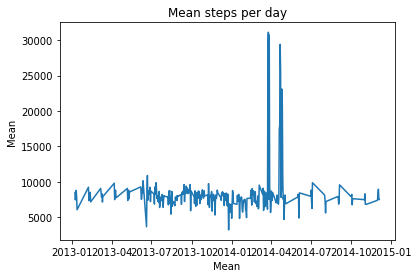

In [39]:
sns.lineplot(x="Date", y="Mean", data=df_date)
plt.title('Mean steps per day')
plt.xlabel("Mean")
plt.show()


Next to the mean steps per day I am also interested in analyzing other variables like height and weight.
In the inital plotting of the data outliers of unrealistic values were identitfied. Weights that were too high or too low to be possible were removed with the function below. 

In [19]:
#To remove the outlier values we need to create a function that we then apply to the entire column

#fix weight
#too high
def below_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_200)

#too low
def above_30(x):
    if(x < 30): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_30)

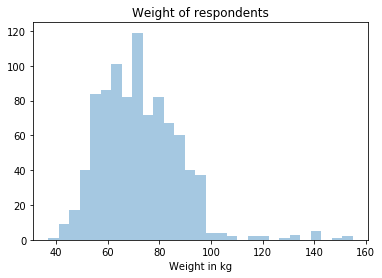

In [20]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of respondents')
plt.xlabel('Weight in kg')
plt.show()

The median weight is: 71.0 kg
The mean weight is: 72.30552546045504 kg


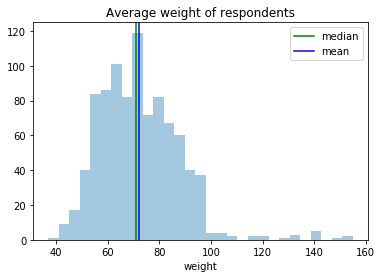

In [21]:
weight_size = df['weight'].dropna() 

mean_size = df['weight'].mean()
median_size = df['weight'].median()

print(f'The median weight is: {median_size} kg')
print(f'The mean weight is: {mean_size} kg')

sns.distplot(weight_size, kde=False)
plt.title('Average weight of respondents')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

In the inital plotting of the data outliers of unrealistic values were identitfied. Height that was too small to be possible was removed with the function below. 

In [ ]:
#fix height 

#too low
def below_100(x):
    if(x < 100): 
        return float('NaN')
    else: 
        return x
df['height'] = df['height'].apply(below_100)

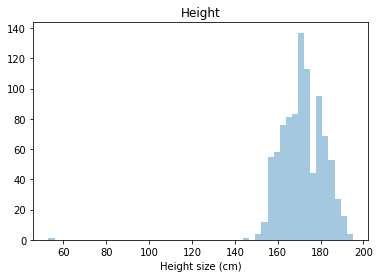

In [7]:
df['height'].name = 'Height size (cm)' #Labeling the variable for plotting
height_size = df['height'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(height_size, kde=False) 
plt.title('Height')
plt.show()

In the following I played around with many graph types possible to visualize height. The mean and median height are very close to each other the median being 172cm and the mean 171.66cm. The density plot visualizes the density in a more smooth form of graph, the violin plot looks pretty but is not very suitable to get readable results and the box plot visualizes the average distribution. 

The median height is: 172.0 cm
The mean height is: 171.54036598493002 cm


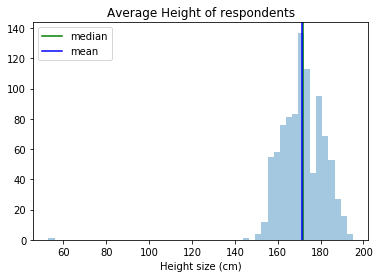

In [8]:
mean_size = df['height'].mean()
median_size = df['height'].median()

print(f'The median height is: {median_size} cm')
print(f'The mean height is: {mean_size} cm')

sns.distplot(height_size, kde=False)
plt.title('Average Height of respondents')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

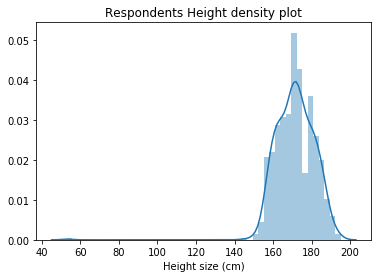

In [9]:
sns.distplot(height_size)
plt.title('Respondents Height density plot')
plt.show() 

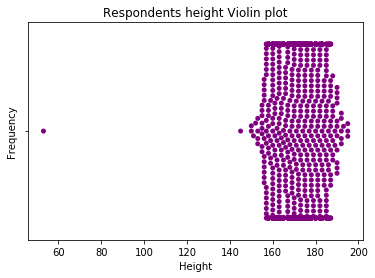

In [11]:
sns.swarmplot(df['height'], color='purple') #default color doesn't stand out
plt.title('Respondents height Violin plot')
plt.ylabel('Frequency')
plt.xlabel('Height')
plt.show()

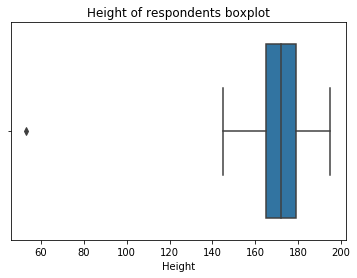

In [12]:
sns.boxplot(df['height'])
plt.title('Height of respondents boxplot')
plt.xlabel('Height')
plt.show()